# Task 2: Identify and Handle Outliers

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a random dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, Std Dev=10, 100 samples

# Add some outliers
data[0] = 120  # Introducing a high outlier
data[1] = 5    # Introducing a low outlier

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

## Step 1: Identify outliers using Z-score and IQR methods

In [16]:
# Z-score method
from scipy import stats
df['Z_score'] = np.abs(stats.zscore(df['Value']))
zscore_threshold = 3  # Define threshold
df['Outlier_Z'] = df['Value'][df['Z_score'] > zscore_threshold]

# IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = df['Value'][(df['Value'] < iqr_lower_bound) | (df['Value'] > iqr_upper_bound)]

## Step 2: Handle outliers

In [18]:
# Create new datasets
df_no_outliers = df[(df['Z_score'] <= zscore_threshold) & 
                    (df['Value'] >= iqr_lower_bound) & 
                    (df['Value'] <= iqr_upper_bound)]

df_capped_outliers = df.copy()
df_capped_outliers.loc[df_capped_outliers['Value'] < iqr_lower_bound, 'Value'] = iqr_lower_bound
df_capped_outliers.loc[df_capped_outliers['Value'] > iqr_upper_bound, 'Value'] = iqr_upper_bound

## Step 3: Visualize distributions

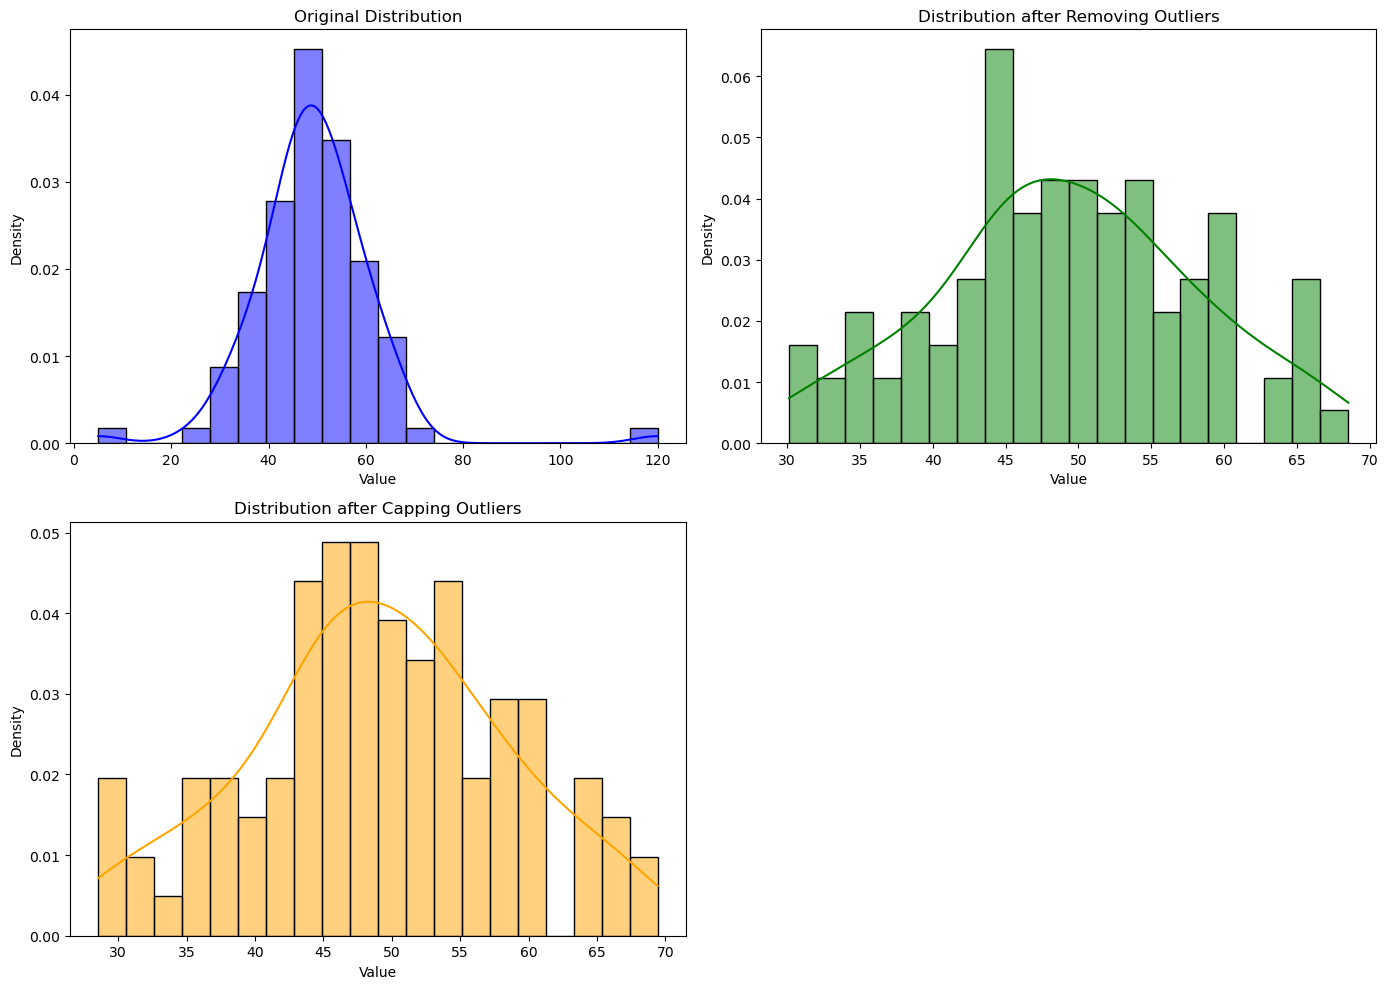

In [20]:
plt.figure(figsize=(14, 10))

# Original distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Value'], kde=True, bins=20, color='blue', stat='density')
plt.title('Original Distribution')

# Distribution after removing outliers
plt.subplot(2, 2, 2)
sns.histplot(df_no_outliers['Value'], kde=True, bins=20, color='green', stat='density')
plt.title('Distribution after Removing Outliers')

# Distribution after capping outliers
plt.subplot(2, 2, 3)
sns.histplot(df_capped_outliers['Value'], kde=True, bins=20, color='orange', stat='density')
plt.title('Distribution after Capping Outliers')

plt.tight_layout()
plt.show()